In [66]:
# imports

from bs4 import BeautifulSoup as soup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline
from urllib.request import urlopen as ureq
import tqdm
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import seaborn as sns

In [ ]:
# _____Webscrapping Sumsung phones

file_name='Sumsung_phones_group_project_Final.csv'
f=open(file_name,'w')
headers="Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),\
            Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),\
            Rear Camera Resolution(MP)  \n"
f.write(headers)
driver = webdriver.Chrome('//Users//sarasaberiyanboroujeni//Documents//Documents//Weclouddata//Webscrapping Projecct//chromedriver.exe')
my_url = 'https://www.bestbuy.ca/en-ca/category/unlocked-samsung-phones/12535387'
driver.get(my_url)

In [ ]:
for i in range(24):
    try:
        element = driver.find_element_by_xpath("//*[@id='root']/div/div/div[2]/div[2]/a/div/button/span")
        sleep(2)
        element.click()
#       HTML parsing
    except:
        pass
html=driver.page_source
page_soup=soup(html,"html.parser")

sumsung_phones= page_soup.findAll("div", {"class":"col-xs-12_1GBy8 col-sm-4_NwItf col-lg-3_2V2hX x-productListItem productLine_2N9kG"})
    
    
driver2 = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')


for phone in sumsung_phones[1:]:
    
  
    sumsung_links= phone.div.a.get('href')
    link='https://www.bestbuy.ca{}'.format(sumsung_links)
    driver2.get(link)
    html=driver2.page_source

    sleep(2)  
    link_soup=soup(html,"html.parser")
    
    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass
    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")

    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
    
    try:
        item_container=link_soup.findAll("div",{"class":"itemContainer_RJI-h"})
    except:
        pass


# phone_container_model=driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]")


    
       
    for tag in item_container:
        try:             
            #         
            if list(tag.children)[0].text == 'Memory - Built-in':
                mem = list(tag.children)[1].text
                mem=mem.replace("GB", "")
                mem=mem.replace("gb", "")
                mem=mem.replace(",","")
                mem=mem.strip()
        except:
            pass
        
        try:            
            if list(tag.children)[0].text == 'RAM Size':
                ram_size = list(tag.children)[1].text
                ram_size = ram_size.replace("GB", "")
                ram_size = ram_size.replace("gb", "")
                ram_size=ram_size.replace(",","")
                ram_size=ram_size.strip()
        except:
            pass
        
        try:
           
            if list(tag.children)[0].text == 'Display Resolution':
                display_resolution = list(tag.children)[1].text
                display_resolution=display_resolution.replace(",", "")
                display_resolution=display_resolution.replace("pixels","")
                display_resolution=display_resolution.lower().split("(", 1)[0]
                display_resolution=display_resolution.replace("wqhd+", "")
                display_resolution=display_resolution.replace("quad hd+","")
                
                display_resolution=display_resolution.strip()
        except:
            pass
                
        try:
            if list(tag.children)[0].text == 'Display Size':
                display_size = list(tag.children)[1].text
                display_size = display_size.replace(",", "")
                display_size=display_size.replace("in", "")
                display_size=display_size.replace("IN","")
                display_size=display_size.strip()
        except:
            pass 
        
        try:
            if list(tag.children)[0].text == 'Colour':
                colour = list(tag.children)[1].text
                colour=colour.replace(",","")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'CPU':
                cpu_n = list(tag.children)[1].text
                cpu_n =cpu_n.replace(",", "")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'Front-Facing Camera Resolution':
                f_camera = list(tag.children)[1].text
                f_camera=f_camera.replace(",", "")
                f_camera=f_camera.lower().split("mp", 1)[0]
                f_camera=f_camera.lower().split("-", 1)[0]
                f_camera=f_camera.replace("-megapixel", "")
                f_camera=f_camera.strip()
                
                
        except:
            pass
        try:
            if list(tag.children)[0].text == 'Rear Camera Resolution':
                r_camera = list(tag.children)[1].text
                r_camera=r_camera.replace(",", "")
                r_camera=r_camera.lower().split("mp", 1)[0]
                r_camera=r_camera.lower().split("-", 1)[0]


                r_camera=r_camera.replace("MP","")
                r_camera=r_camera.replace("mp", "")
                r_camera=r_camera.replace("Wide-Angle & Telephoto Cameras", "")
                r_camera=r_camera.replace("super speed dual pixel ","")
                r_camera=r_camera.strip()
                
        except:
            pass
        
        
        
    f.write(brand + "," + model + "," + price + "," + price_save + "," + mem + "," + ram_size + "," + display_resolution + "," + display_size + "," + colour + "," + cpu_n + ","  + f_camera + "," + r_camera + "\n")


f.close()
   





In [7]:
# WEBSCRAPING APPLE PHONES
file_name='Apple_phones_group_Final2.csv'
f=open(file_name,'w')
headers="Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)  \n"
f.write(headers)
driver = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')
my_url = 'https://www.bestbuy.ca/en-ca/category/unlocked-iphones/743358'
driver.get(my_url)

In [ ]:
for i in range(1100):
    try:
        element = driver.find_element_by_xpath("//*[@id='root']/div/div/div[2]/div[2]/a/div/button/span")
        sleep(3)
        element.click()
    except:
        pass
    

In [ ]:
list(tag.children)[0].text == 'Display Size':
display_size = list(tag.children)[1].text
display_size = display_size.replace(",", "")
display_size=display_size.replace("in", "")
display_size=display_size.replace("IN","")
display_size=display_size.strip()

list(tag.children)[0].text == 'Display Resolution':
display_resolution = list(tag.children)[1].text
display_resolution=display_resolution.replace(",", "")
display_resolution=display_resolution.replace("pixels","")
display_resolution=display_resolution.lower().split("(", 1)[0]
display_resolution=display_resolution.strip()

In [ ]:
for i in range(1100):
    try:
        element = driver.find_element_by_xpath("//*[@id='root']/div/div/div[2]/div[2]/a/div/button/span")
        sleep(3)
        element.click()
#       HTML parsing
    except:
        pass
    

html=driver.page_source
page_soup=soup(html,"html.parser")

apple_phones= page_soup.findAll("div", {"class":"col-xs-12_1GBy8 col-sm-4_NwItf col-lg-3_2V2hX x-productListItem productLine_2N9kG"})
    
    
driver2 = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')



for phone in apple_phones[1:]:
    
  
    apple_links= phone.div.a.get('href')
    link='https://www.bestbuy.ca{}'.format(apple_links)
    driver2.get(link)
    html=driver2.page_source

    sleep(3)  
    link_soup=soup(html,"html.parser")
    
    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass

    sleep(5)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(5)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
    
    try:
        item_container=link_soup.findAll("div",{"class":"itemContainer_RJI-h"})
    except:
        pass


# phone_container_model=driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]")

       
    for tag in item_container:
        try:             
            #         
            if list(tag.children)[0].text == 'Memory - Built-in':
                mem = list(tag.children)[1].text
                mem=mem.replace("GB", "")
                mem=mem.replace("gb", "")
                mem=mem.replace(",","")
                mem=mem.strip()
        except:
            pass
        
        try:            
            if list(tag.children)[0].text == 'RAM Size':
                ram_size = list(tag.children)[1].text
                ram_size = ram_size.replace("GB", "")
                ram_size = ram_size.replace("gb", "")
                ram_size=ram_size.replace(",","")
                ram_size=ram_size.strip()
        except:
            pass
        
        try:
           
            if list(tag.children)[0].text == 'Display Resolution':
                display_resolution = list(tag.children)[1].text
                display_resolution=display_resolution.replace(",", "")
                display_resolution=display_resolution.replace("pixels","")
                display_resolution=display_resolution.lower().split("(", 1)[0]
                display_resolution=display_resolution.strip()
        except:
            pass
                
        try:
            if list(tag.children)[0].text == 'Display Size':
                display_size = list(tag.children)[1].text
                display_size = display_size.replace(",", "")
                display_size=display_size.replace("in", "")
                display_size=display_size.replace("IN","")
                display_size=display_size.strip()
        except:
            pass 
        
        try:
            if list(tag.children)[0].text == 'Colour':
                colour = list(tag.children)[1].text
                colour=colour.replace(",","")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'CPU':
                cpu_n = list(tag.children)[1].text
                cpu_n =cpu_n.replace(",", "")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'Front-Facing Camera Resolution':
                f_camera = list(tag.children)[1].text
                f_camera=f_camera.replace(",", "")
                f_camera=f_camera.lower().split("mp", 1)[0]
                f_camera=f_camera.lower().split("-", 1)[0]
                f_camera=f_camera.replace("-megapixel", "")
                f_camera=f_camera.strip()
                
                
        except:
            pass
        try:
            if list(tag.children)[0].text == 'Rear Camera Resolution':
                r_camera = list(tag.children)[1].text
                r_camera=r_camera.replace(",", "")
                r_camera=r_camera.lower().split("mp", 1)[0]
                r_camera=r_camera.lower().split("-", 1)[0]


                r_camera=r_camera.replace("MP","")
                r_camera=r_camera.replace("mp", "")
                r_camera=r_camera.replace("Wide-Angle & Telephoto Cameras", "")
                r_camera=r_camera.replace("3 x ","")
                r_camera=r_camera.strip()
                
        except:
            pass
        
       
    f.write(brand + "," + model + "," + price + "," + price_save + "," + mem + "," + ram_size + "," + display_resolution + "," + display_size + "," + colour + "," + cpu_n + ","  + f_camera + "," + r_camera + "\n")

f.close()
   



# Visualization

In [2]:
import pandas as pd
import numpy as np
import random 

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px


py.init_notebook_mode(connected=True)


### Preprocessing Samsung smartphones

In [3]:
Samsung_pd = pd.read_csv('/Users/sarasaberiyanboroujeni/Documents/Documents/Weclouddata/Webscrapping Projecct/Sumsung_phones_group_project_Database.csv',sep=",",index_col=False)
Samsung_pd .drop_duplicates(inplace=True)
Samsung_pd.head(5)
Samsung_pd['Brand']=[t.upper() for t in Samsung_pd['Brand']]
Samsung_pd['Model']=[t.upper() for t in Samsung_pd['Model']]


Samsung_pd.loc[5:10]


,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
5,SAMSUNG,GALAXY A20,149.97,200,512,3,720 x 1560,5.8,Black,Octa-core Snapdragon 865,8,13
6,SAMSUNG,GALAXY NOTE10+,939.99,560,256,12,3040 x 1440,6.8,Aura Black,Snapdragon 855,10,12
7,SAMSUNG,GALAXY A70,629.99,no sale,128,6,1080 x 2400,6.7,Aura Black,Snapdragon 855,32,32
8,SAMSUNG,GALAXY S20+,1579.99,no sale,128,6,1080 x 2400,6.7,Black,Octa-core Snapdragon 865,32,32
9,SAMSUNG,GALAXY A50,449.95,no sale,64,4,1080 x 2340,6.4,Black,Octa-core Snapdragon 865,25,25
10,SAMSUNG,GALAXY A51,368.90,131,64,4,1080 x 2340,6.4,Black,Octa-core Snapdragon 865,25,25


In [4]:
Samsung_pd.describe()

,Price(CAD),Display_size(in)
count,532.000000,532.000000
mean,474.616786,5.970733
std,339.621343,0.486761
min,79.990000,4.300000
25%,219.000000,5.800000
50%,379.990000,6.200000
75%,629.990000,6.300000
max,2109.990000,6.800000


In [5]:
Samsung_pd['Ram_size(GB)'].unique()

array(['2', '3', '12', '6', '4', '8', '1', '1.5', '512 MB', '3/4 Gb Ram',
       '64'], dtype=object)

In [ ]:
Samsung_pd['Ram_size(GB)'][Samsung_pd['Ram_size(GB)']=='512 MB']=0.512
Samsung_pd['Ram_size(GB)'][Samsung_pd['Ram_size(GB)']=='3/4 Gb Ram']=0.75


In [ ]:
Samsung_pd['Memory-Built-in(GB)'][Samsung_pd['Memory-Built-in(GB)']=='32 MB']=0.32
Samsung_pd['Memory-Built-in(GB)'][Samsung_pd['Memory-Built-in(GB)']=='16 MB']=0.16
Samsung_pd['Memory-Built-in(GB)']=Samsung_pd['Memory-Built-in(GB)'].astype(float)

In [14]:
Samsung_pd=Samsung_pd[Samsung_pd['Front-Facing Camera Resolution(MP)']!='cmos 8.0']
Samsung_pd.head(5)

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,SAMSUNG,GALAXY A10E,179.99,20,32.0,2,720 x 1560,5.8,Black,Octa-core Snapdragon 855,5.0,8
1,SAMSUNG,GALAXY S20,1849.99,no sale,128.0,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8
2,SAMSUNG,GALAXY S20,1319.99,no sale,128.0,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8
4,SAMSUNG,GALAXY S20,2109.99,no sale,512.0,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8
5,SAMSUNG,GALAXY A20,149.97,200,512.0,3,720 x 1560,5.8,Black,Octa-core Snapdragon 865,8.0,13


In [ ]:
Samsung_pd['Front-Facing Camera Resolution(MP)'][Samsung_pd['Front-Facing Camera Resolution(MP)']=='front : 5']=5

Samsung_pd['Front-Facing Camera Resolution(MP)'][Samsung_pd['Front-Facing Camera Resolution(MP)']=='1080p@30fps']=1.08
Samsung_pd=Samsung_pd[Samsung_pd['Front-Facing Camera Resolution(MP)']!='cmos 8.0']
Samsung_pd=Samsung_pd[Samsung_pd['Front-Facing Camera Resolution(MP)']!='2592x1944']
Samsung_pd=Samsung_pd[Samsung_pd['Front-Facing Camera Resolution(MP)']!='no']

Samsung_pd['Front-Facing Camera Resolution(MP)']=Samsung_pd['Front-Facing Camera Resolution(MP)'].astype(float)


In [ ]:
Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='rear : 16']=16
Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='single 13']=13

Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='x3 camera; 12']=48
Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='x3 camera: 12']=48

Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='triple: 12']=48

Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='25 plus 5']=32
Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='25 plus 8 plus 5']=40
Samsung_pd['Rear Camera Resolution(MP)  '][Samsung_pd['Rear Camera Resolution(MP)  ']=='dual camera with dual ois (optical image stabilization)']=24

Samsung_pd['Rear Camera Resolution(MP)  ']=Samsung_pd['Rear Camera Resolution(MP)  '].astype(float)

In [17]:
Samsung_pd.describe()

,Price(CAD),Memory-Built-in(GB),Display_size(in),Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,475.714820,91.834556,5.971890,9.167675,15.551985
std,340.230766,99.980238,0.486564,4.859675,7.548181
min,79.990000,0.160000,4.300000,1.080000,5.000000
25%,219.000000,32.000000,5.800000,8.000000,12.000000
50%,379.990000,64.000000,6.200000,8.000000,13.000000
75%,629.990000,128.000000,6.300000,10.000000,16.000000
max,2109.990000,1000.000000,6.800000,32.000000,56.000000


In [18]:
Samsung_pd.to_csv('/Users/sarasaberiyanboroujeni/Documents/Documents/Weclouddata/Webscrapping Projecct/Update_Samsun_phone.csv')

### Preprocessing Apple smartphones

In [58]:
Apple_pd = pd.read_csv('/Users/sarasaberiyanboroujeni/Documents/Documents/Weclouddata/Webscrapping Projecct/Apple_phones_group_Final2.csv',sep=",",index_col=False, encoding='latin-1')
Apple_pd.head(5)
Apple_pd.drop_duplicates(inplace=True)
Apple_pd['Brand']=[t.upper() for t in Apple_pd['Brand']]
Apple_pd['Model']=[t.upper() for t in Apple_pd['Model']]
Apple_pd.head(5)



,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,APPLE,IPHONE 7,223.40,270,32,2.0,750 x 1334,4.7,Black,Apple A10 Fusion,7.0,12.0
1,APPLE,IPHONE 8,354.10,245,64,2.0,1334 x 750,4.7,Grey,Apple A11 Bionic,7,12
2,APPLE,IPHONE XR,598.99,101,64,3.0,1792 x 828,6.1,Black,Apple A12 Bionic,7,12
3,APPLE,IPHONE 11,979.99,no sale,64,3.0,1792 x 828,6.1,Black,A13 Bionic Chip,7,12
4,APPLE,IPHONE X,624.99,575,256,3.0,2436 x 1125,5.8,Silver,Apple A11 Bionic,7,12


In [59]:
Apple_pd.describe()

,Price(CAD),Ram_size(GB),Display_size(in)
count,1015.000000,1015.000000,1015.000000
mean,472.476030,2.384236,5.150837
std,325.908649,0.833322,0.736373
min,79.980000,1.000000,3.500000
25%,248.675000,2.000000,4.700000
50%,357.000000,2.000000,4.700000
75%,634.985000,3.000000,5.800000
max,1999.990000,4.000000,6.500000


In [ ]:
Apple_pd['Front-Facing Camera Resolution(MP)'][Apple_pd['Front-Facing Camera Resolution(MP)']=='720p hd']='0.72'
Apple_pd=Apple_pd[Apple_pd['Front-Facing Camera Resolution(MP)']!='vga videocalling over wi']

Apple_pd['Front-Facing Camera Resolution(MP)']=Apple_pd['Front-Facing Camera Resolution(MP)'].astype(float)




In [ ]:
Apple_pd['Memory-Built-in(GB)'][Apple_pd['Memory-Built-in(GB)']=='64 MB']=0.64
Apple_pd['Memory-Built-in(GB)'][Apple_pd['Memory-Built-in(GB)']=='16 MB']=0.16
Apple_pd['Memory-Built-in(GB)']=Apple_pd['Memory-Built-in(GB)'].astype(float)



In [ ]:
Apple_pd['Rear Camera Resolution(MP)  '][Apple_pd['Rear Camera Resolution(MP)  ']=='x3 12']=48
Apple_pd['Rear Camera Resolution(MP)  '][Apple_pd['Rear Camera Resolution(MP)  ']=='dual 12']=24
Apple_pd['Rear Camera Resolution(MP)  '][Apple_pd['Rear Camera Resolution(MP)  ']=='12 megapixel 4k']=12
Apple_pd['Rear Camera Resolution(MP)  '][Apple_pd['Rear Camera Resolution(MP)  ']=='8 megapixel 1080p']=8

Apple_pd=Apple_pd[Apple_pd['Rear Camera Resolution(MP)  ']!='digital zoom auto flash digital image stabilization face detection simultaneous hd video and image recording touch to focus. 3264 x 2448 pixels']
Apple_pd['Rear Camera Resolution(MP)  ']=Apple_pd['Rear Camera Resolution(MP)  '].astype(float)



In [ ]:
Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE SE PLUS')]='IPHONE SE PLUS'


Apple_pd['Model'][Apple_pd['Model'].str.startswith('SE')]='IPHONE SE'


Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE SE')]='IPHONE SE'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONESE')]='IPHONE SE'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('X')]='IPHONE X'



Apple_pd['Model'][Apple_pd['Model'].str.startswith('6 PLUS')]='IPHONE 6 PLUS'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('6S PLUS')]='IPHONE 6S PLUS'

Apple_pd['Model'][Apple_pd['Model'].str.startswith('6S')]='IPHONE 6S'


Apple_pd['Model'][Apple_pd['Model'].str.startswith('6')]='IPHONE 6'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('5S PLUS')]='IPHONE 5S PLUS'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('5S')]='IPHONE 5S'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('7 PLUS')]='IPHONE 7 PLUS'


Apple_pd['Model'][Apple_pd['Model'].str.startswith('7')]='IPHONE 7'

Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE 7 PLUS')]='IPHONE 7 PLUS'

Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE 7')]='IPHONE 7'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE7')]='IPHONE 7'
Apple_pd['Model'][Apple_pd['Model'].str.startswith('IPHONE 8')]='IPHONE 7'

In [33]:

Apple_pd.to_csv('/Users/sarasaberiyanboroujeni/Documents/Documents/Weclouddata/Webscrapping Projecct/Update_Apple_phone.csv')

## Analyzing Apple and Samsung 

In [ ]:
Samsung_Apple=pd.concat([Samsung_pd, Apple_pd])
Samsung_Apple
Samsung_Apple['Brand'][Samsung_Apple['Brand']=='NEW-SAMSUNG']='SAMSUNG'
Samsung_Apple['Brand'][Samsung_Apple['Brand']=='IPHONE']='APPLE'


Samsung_Apple=Samsung_Apple[Samsung_Apple['Brand'].isin(['SAMSUNG','APPLE'])]

Samsung_Apple['Ram_size(GB)']=Samsung_Apple['Ram_size(GB)'].astype(float)
Samsung_Apple['Memory-Built-in(GB)']=Samsung_Apple['Memory-Built-in(GB)'].astype(float)

Samsung_Apple['Front-Facing Camera Resolution(MP)']=Samsung_Apple['Front-Facing Camera Resolution(MP)'].astype(float)

Samsung_Apple['Rear Camera Resolution(MP)  ']=Samsung_Apple['Rear Camera Resolution(MP)  '].astype(float)


Samsung_Apple.to_csv('/Users/sarasaberiyanboroujeni/Documents/Documents/Weclouddata/Webscrapping Projecct/update_samsung_apple.csv')



#### Price Distribution

In [38]:
# ___Histogram of price for two brands
fig = px.histogram(Samsung_Apple,x='Price(CAD)',color="Brand")
fig.show()


In [39]:
Samsung_Apple[Samsung_Apple['Model']=='GALAXY S20']

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
1,SAMSUNG,GALAXY S20,1849.99,no sale,128.0,2.0,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8.0
2,SAMSUNG,GALAXY S20,1319.99,no sale,128.0,2.0,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8.0
4,SAMSUNG,GALAXY S20,2109.99,no sale,512.0,2.0,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5.0,8.0


In [40]:
       
price_range = pd.cut(Samsung_Apple['Price(CAD)'], [0,500, 1000, 1500,2000,2500,3000])
table = pd.pivot_table(Samsung_Apple, values=['Ram_size(GB)', 'Memory-Built-in(GB)','Front-Facing Camera Resolution(MP)','Rear Camera Resolution(MP)  '], index=['Brand', price_range],
                    aggfunc={'Ram_size(GB)': [max,min],
                         'Memory-Built-in(GB)' :[max,min], 'Front-Facing Camera Resolution(MP)' :[max,min], 'Rear Camera Resolution(MP)  ' :[max,min]
                            })

table

Front-Facing Camera Resolution(MP)        \
                                                    max   min   
Brand   Price(CAD)                                              
APPLE   (0, 500]                                   12.0  0.72   
        (500, 1000]                                12.0  0.72   
        (1000, 1500]                               12.0  5.00   
        (1500, 2000]                               12.0  5.00   
SAMSUNG (0, 500]                                   32.0  1.08   
        (500, 1000]                                32.0  1.08   
        (1000, 1500]                               16.0  5.00   
        (1500, 2000]                               32.0  5.00   
        (2000, 2500]                                5.0  5.00   

                     Memory-Built-in(GB)         Ram_size(GB)         \
                                     max     min          max    min   
Brand   Price(CAD)                                                     
APPLE   (0, 500]                   256.0    0.16          4.0  1.000   
        (500, 1000]                512.0    0.16          4.0  1.000   
        (1000, 1500]               512.0   64.00          4.0  2.000   
        (1500, 2000]               512.0   64.00          4.0  2.000   
SAMSUNG (0, 500]                   512.0    0.16         64.0  0.512   
        (500, 1000]                512.0    8.00         12.0  1.000   
        (1000, 1500]               512.0   32.00         12.0  2.000   
        (1500, 2000]              1000.0  128.00         12.0  2.000   
        (2000, 2500]               512.0  512.00          2.0  2.000   

                     Rear Camera Resolution(MP)          
                                              max   min  
Brand   Price(CAD)                                       
APPLE   (0, 500]                             48.0   8.0  
        (500, 1000]                          24.0   8.0  
        (1000, 1500]                         48.0  12.0  
        (1500, 2000]                         48.0  12.0  
SAMSUNG (0, 500]                             45.0   5.0  
        (500, 1000]                          56.0   5.0  
        (1000, 1500]                         48.0   8.0  
        (1500, 2000]                         40.0   8.0  
        (2000, 2500]                          8.0   8.0

In [41]:
phone_colour=Samsung_pd['Colour'].value_counts().sort_values().tail(10)
phone_colour


Black Onyx         14
black              16
Blue               18
Lilac Purple       20
Orchid Gray        20
Titanium Grey      22
Prism White        26
Prism Black        37
Midnight Black     51
Black             115
Name: Colour, dtype: int64

In [43]:

# --- the distribution of phone based on the colour

phone_colour=Samsung_pd['Colour'].value_counts().sort_values(ascending=False).head(20)
m=phone_colour.index
n=[]
for i in m:
    
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
    
    if 'blue' in i.lower():
        i="blue"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
            
                
    
    if 'black' == i.lower():
        i="  #000000"
        n.append(i.lower())

    if 'black onyx' == i.lower():
        i=" #333333"
        n.append(i.lower())
        
    if 'prism black' == i.lower():
        i=" #404040"
        n.append(i.lower())
        
    if 'aura black' == i.lower():
        i=" #0d0d0d"
        n.append(i.lower())
        
    if 'midnight black' == i.lower():
        i="  #1a1a1a"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    
       
    if 'grey'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'Grey' in i.lower():
        i="grey"
        n.append(i.lower())    
        
        
    if 'black' in i.lower():
        i="  #000000"
        n.append(i.lower())
        

        
    if 'titanium grey'== i.lower():
        i="grey"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
  
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold' in i.lower():
        i='gold'
        n.append(i)
        
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
   

#### Samsung color visualization

In [44]:
colors = n


fig = go.Figure(data=[go.Bar(
    x=phone_colour.index,
    y=phone_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')


#### Apple color visualization

In [46]:
Apple_colour =Apple_pd['Colour'].value_counts().sort_values(ascending=False).head(20)


m=Apple_colour.index
n=[]
for i in m:
    
    if 'black' in i.lower():
        i="black"
        n.append(i.lower())

       
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
       
    if 'gray'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())

        
    if 'grey'==i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold'==i.lower():
        i='gold'
        n.append(i)
        
        
    if 'blue' in i.lower():
        i='blue'
        n.append(i)
        
    if 'yellow' in i.lower():
        i='yellow'
        n.append(i)
        
    if 'green'==i.lower():
        i='green'
        n.append(i)
        
    if 'gold white'==i.lower():
        i='gold'
        n.append(i)
    if 'rose'==i.lower():
        i='pink'
        n.append(i)
         
        
colors = n


fig = go.Figure(data=[go.Bar(
    x=Apple_colour.index,
    y=Apple_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')

#### Price descriptive analysis

In [47]:
Samsung_Apple.groupby("Brand")['Price(CAD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
APPLE,950.0,477.334884,326.487653,79.98,249.275,359.00,644.99,1999.99
SAMSUNG,506.0,476.687055,342.393208,79.99,219.990,379.99,629.74,2109.99


In [48]:
# --Phones with discout
Samsung_Apple[Samsung_Apple['Price_save(CAD)']!='no sale']

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,SAMSUNG,GALAXY A10E,179.99,20,32.0,2.0,720 x 1560,5.8,Black,Octa-core Snapdragon 855,5.0,8.0
5,SAMSUNG,GALAXY A20,149.97,200,512.0,3.0,720 x 1560,5.8,Black,Octa-core Snapdragon 865,8.0,13.0
6,SAMSUNG,GALAXY NOTE10+,939.99,560,256.0,12.0,3040 x 1440,6.8,Aura Black,Snapdragon 855,10.0,12.0
10,SAMSUNG,GALAXY A51,368.90,131,64.0,4.0,1080 x 2340,6.4,Black,Octa-core Snapdragon 865,25.0,25.0
14,SAMSUNG,GALAXY S10,639.99,360,128.0,8.0,3040 x 1440,6.1,Prism Black,Octa-core Snapdragon 855,10.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,APPLE,IPHONE XR,719.78,39,128.0,2.0,1792 x 828-pixel resolution at 326 ppi,6.1,Blue,A12 Bionic chip,7.0,12.0
1038,APPLE,IPHONE X,825.00,704,256.0,3.0,2436 x 1125,5.8,Silver,Apple A11 Bionic,7.0,12.0
1039,APPLE,IPHONE 6S,371.00,6,256.0,2.0,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5.0,12.0
1040,APPLE,IPHONE 6,194.00,105,256.0,2.0,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5.0,12.0


#### Average,max,min price

In [49]:

stat=['Max', 'Min', 'Avg']
YS=Samsung_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YA=Apple_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YS.values[0][1:4]

fig = go.Figure(data=[
    go.Bar(name='Samsung Phone', x=stat, y=[YS.values[0][1], YS.values[0][2],YS.values[0][3]]),
    go.Bar(name='Apple Phone', x=stat, y=[YA.values[0][1], YA.values[0][2],YA.values[0][3]])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()


#### Compare the Most Expensive Smart Phones

In [ ]:
# --The details and specefication of the most expensive phones
x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].max()]
x['Rear Camera Resolution(MP)  ']='12MP f/2.2 Ultra Wide, 108MP f/1.8 Wide, 48MP f/3.5 Telephoto, Depth Vision (ToF)'
x['Front-Facing Camera Resolution(MP)']='40MP f2.2'
x['Ram_size(GB)']=16
x['Display_resolution(pixels)']='3200 x 1440 WQHD+'


y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].max()]
y['Rear Camera Resolution(MP)  ']='3 x 12'
y['Front-Facing Camera Resolution(MP)']='12 MP, f/2.2, 23mm (wide); SL 3D camera'
y['Ram_size(GB)']=8
y['Display_resolution(pixels)']='2688 x 1242'


MAX_SA=pd.concat([x, y])




#### Compare the cheapest Smart Phones

In [ ]:
# --The details and specefication of the cheapest phones

x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].min()]
x['Display_resolution(pixels)']='480 x 800'
y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].min()]
MIN_SA=pd.concat([x, y])
MIN_SA.tail(2)

#### Apple pair plot

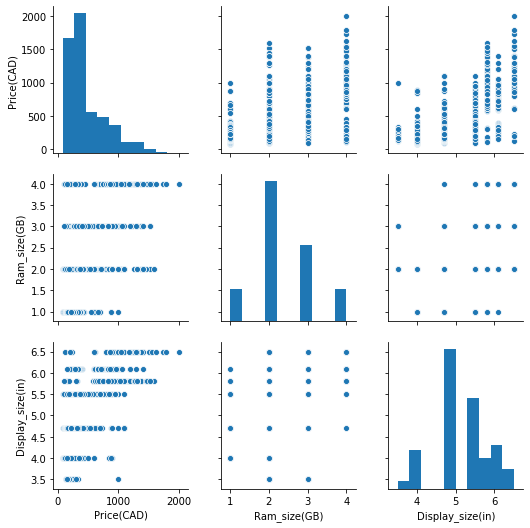

In [67]:
sns.pairplot(Apple_pd);

#### Samsung model distribution

In [74]:
Model = Samsung_pd['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(200,150,180,0.8)'
    }
)

layout = go.Layout(
    title='Model Type Counts Samsung',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)

#### Apple model distribution

In [75]:
Model = Apple_pd['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(65,33,180,120)'
    }
)

layout = go.Layout(
    title='Model Type Counts Apple',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)